In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import SGDRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
cdf=pd.read_excel("customer_retention_dataset.xlsx")

In [3]:
cdf

,Gender,Age,City,Code,Long,Purchases,Access,Device,Screen,OS,...,Longertime,Longertimeindisplayinggraph,Latedecl,Longerpage,Ltdmodeofpay,Longdelper,Changeinweb,Fredis,Webeff,Recommend
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [5]:
le=LabelEncoder()
cdf['Age']=le.fit_transform(cdf['Age'])
list1=['Age','City','Purchases','Why','Easytouse','Tickonlineret','Webpagelayout','Wildvariety','Completerelevant','Fastloading','Reliabilityofweb','Qucikness','Availpayop','Speedyorderdel','Privofcusinfo','Secofcusinfo','Pertrust','Presenceofmultichan','Longertime','Longertimeindisplayinggraph','Latedecl','Longerpage','Ltdmodeofpay','Longdelper','Changeinweb','Fredis','Webeff','Recommend']
for val in list1:
    cdf[val]=le.fit_transform(cdf[val].astype(str))
cdf

,Gender,Age,City,Code,Long,Purchases,Access,Device,Screen,OS,...,Longertime,Longertimeindisplayinggraph,Latedecl,Longerpage,Ltdmodeofpay,Longdelper,Changeinweb,Fredis,Webeff,Recommend
0,Male,1,2,110009,Above 4 years,2,Dial-up,Desktop,Others,Window/windows Mobile,...,0,0,3,5,0,3,2,0,0,6
1,Female,0,2,110030,Above 4 years,3,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,1,6,7,10,7,5,0,4,1,3
2,Female,0,4,201308,3-4 years,3,Mobile Internet,Smartphone,5.5 inches,Android,...,7,6,4,7,0,3,5,6,0,5
3,Male,0,6,132001,3-4 years,5,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,9,7,4,8,5,3,1,1,2,1
4,Female,0,0,530068,2-3 years,0,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,5,8,5,8,7,3,0,7,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,0,10,173212,1-2 years,5,Mobile Internet,Smartphone,5.5 inches,Android,...,0,0,0,0,0,0,0,0,0,0
265,Female,1,3,201008,1-2 years,2,Mobile Internet,Smartphone,Others,Android,...,4,4,3,5,3,1,2,2,4,6
266,Female,2,0,560010,2-3 years,5,Mobile internet,Laptop,Others,Window/windows Mobile,...,0,9,0,10,7,5,6,7,0,0
267,Female,4,10,173229,2-3 years,5,Wi-Fi,Smartphone,5.5 inches,Android,...,0,2,0,4,0,0,0,5,5,0


<AxesSubplot:xlabel='Long', ylabel='count'>

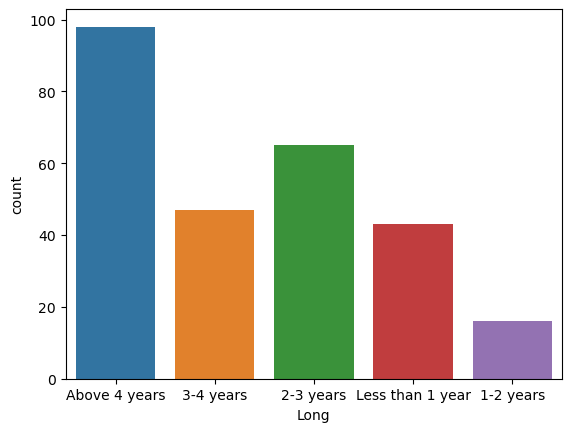

In [29]:
sns.countplot(cdf['Long'])

In [ ]:
people are shopping online above 4 years

<AxesSubplot:xlabel='Code'>

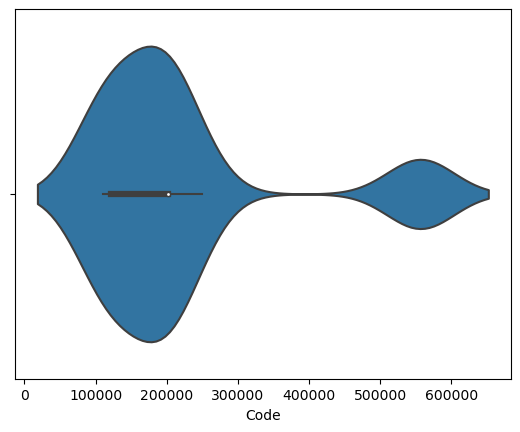

In [31]:
sns.violinplot(cdf['Code'])

In [ ]:
Pincode are more in the range of 200000

<AxesSubplot:xlabel='Gender', ylabel='count'>

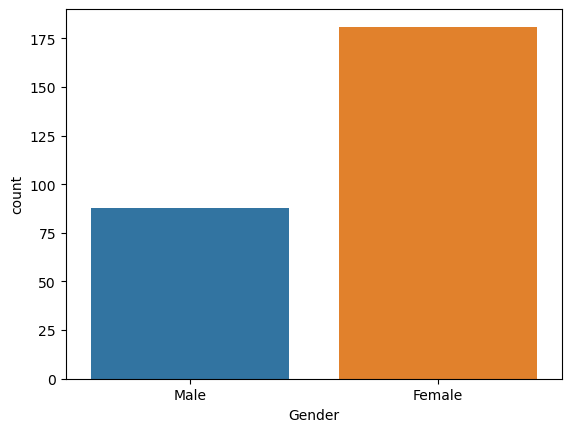

In [36]:
sns.countplot(cdf['Gender'])

In [ ]:
Female customers are more than male customers

<AxesSubplot:xlabel='Access', ylabel='count'>

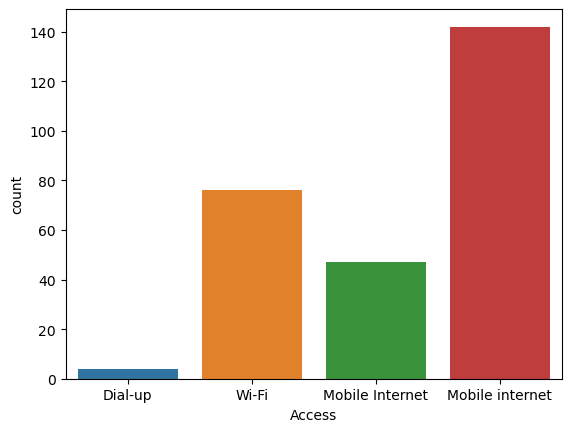

In [38]:
sns.countplot(cdf['Access'])

<AxesSubplot:xlabel='Device', ylabel='count'>

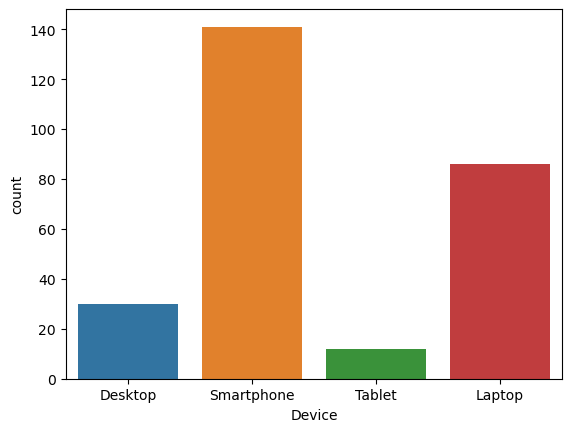

In [40]:
sns.countplot(cdf['Device'])

<AxesSubplot:xlabel='Screen', ylabel='count'>

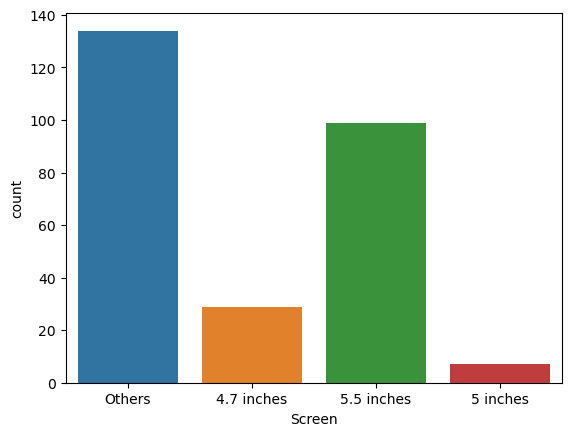

In [41]:
sns.countplot(cdf['Screen'])

<AxesSubplot:xlabel='OS', ylabel='count'>

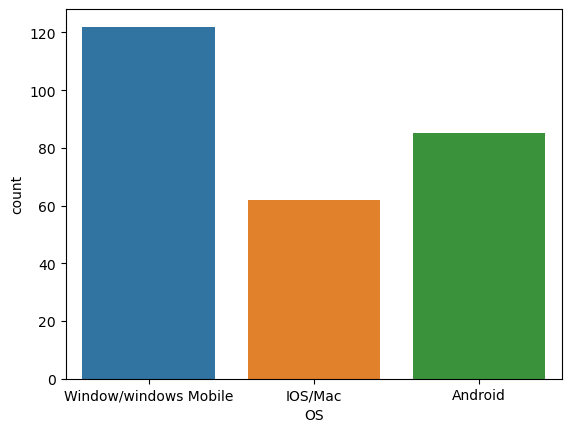

In [42]:
sns.countplot(cdf['OS'])

<AxesSubplot:xlabel='Latedecl', ylabel='count'>

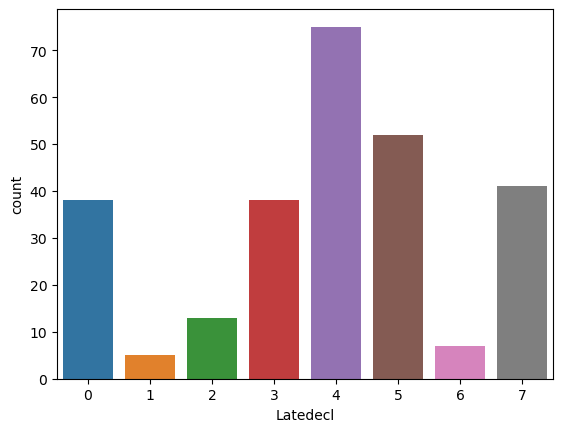

In [49]:
sns.countplot(cdf['Latedecl'])

<AxesSubplot:xlabel='Longerpage', ylabel='count'>

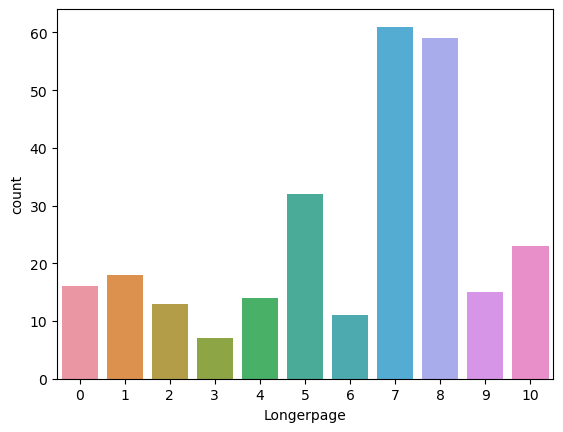

In [51]:
sns.countplot(cdf['Longerpage'])

<AxesSubplot:xlabel='Ltdmodeofpay', ylabel='count'>

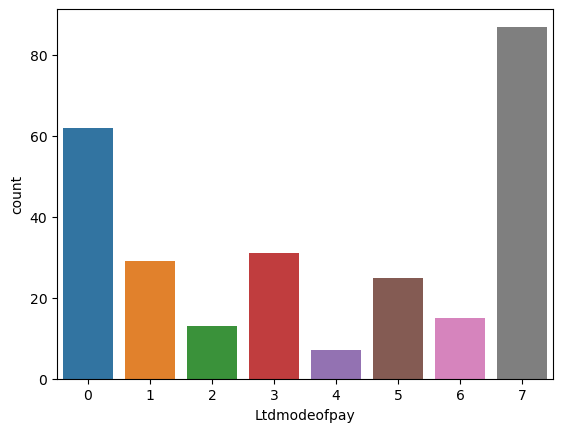

In [52]:
sns.countplot(cdf['Ltdmodeofpay'])

<AxesSubplot:xlabel='Longdelper', ylabel='count'>

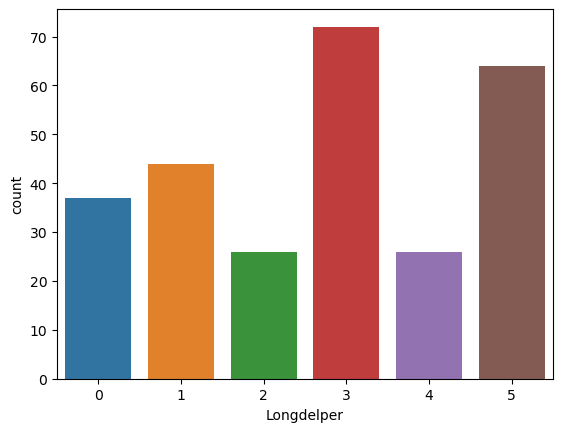

In [53]:
sns.countplot(cdf['Longdelper'])

<AxesSubplot:xlabel='Changeinweb', ylabel='count'>

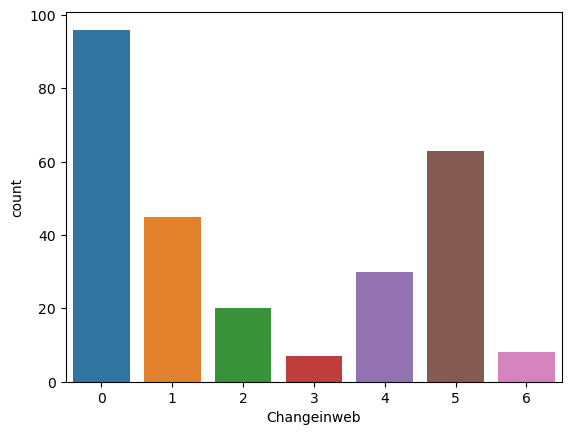

In [54]:
sns.countplot(cdf['Changeinweb'])

<AxesSubplot:xlabel='Fredis', ylabel='count'>

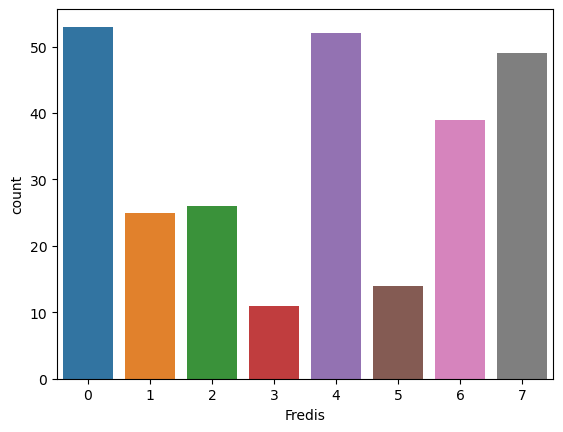

In [55]:
sns.countplot(cdf['Fredis'])

<AxesSubplot:xlabel='Webeff', ylabel='count'>

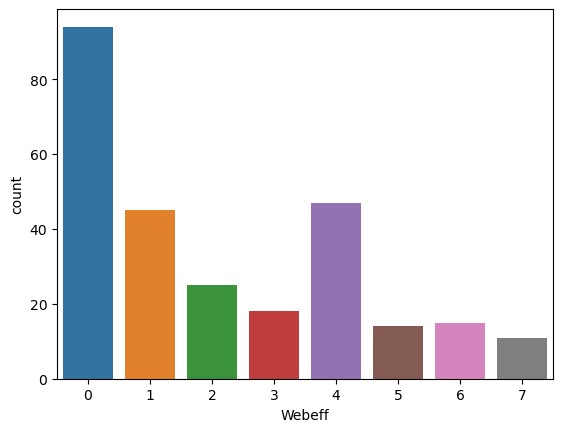

In [56]:
sns.countplot(cdf['Webeff'])

<AxesSubplot:xlabel='Recommend', ylabel='count'>

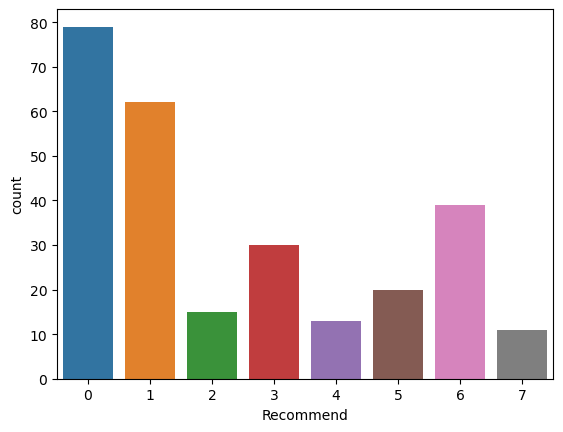

In [57]:
sns.countplot(cdf['Recommend'])

<AxesSubplot:xlabel='Browser', ylabel='count'>

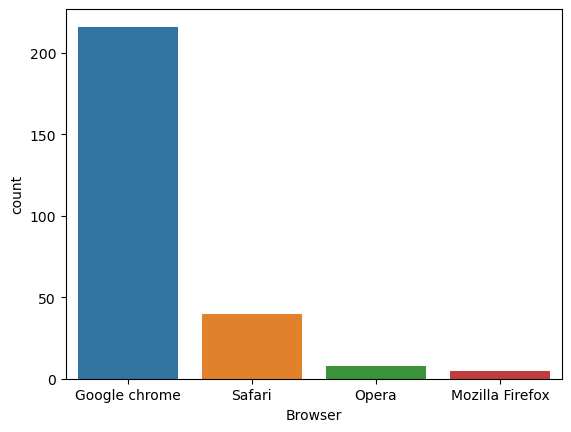

In [58]:
sns.countplot(cdf['Browser'])

<AxesSubplot:xlabel='Chanel', ylabel='count'>

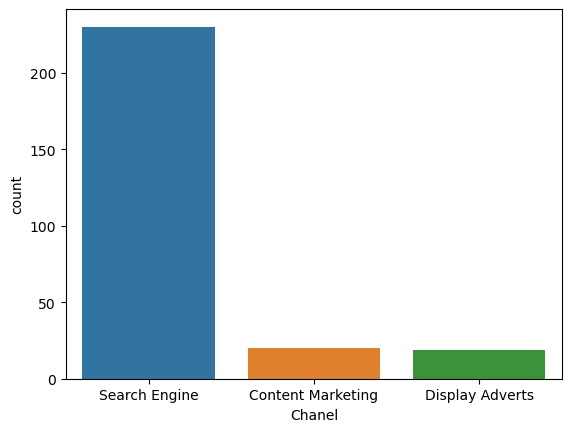

In [59]:
sns.countplot(cdf['Chanel'])

<AxesSubplot:xlabel='Reach', ylabel='count'>

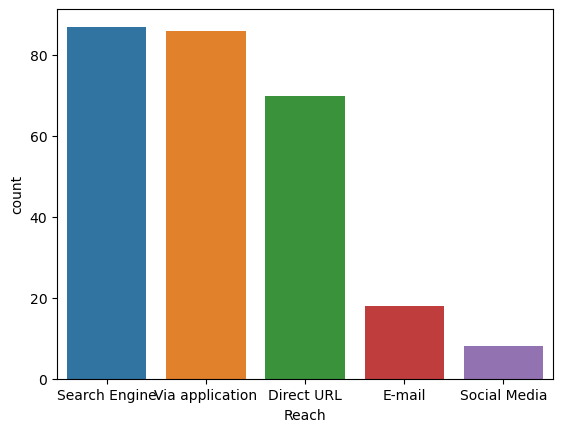

In [60]:
sns.countplot(cdf['Reach'])

<AxesSubplot:xlabel='Time', ylabel='count'>

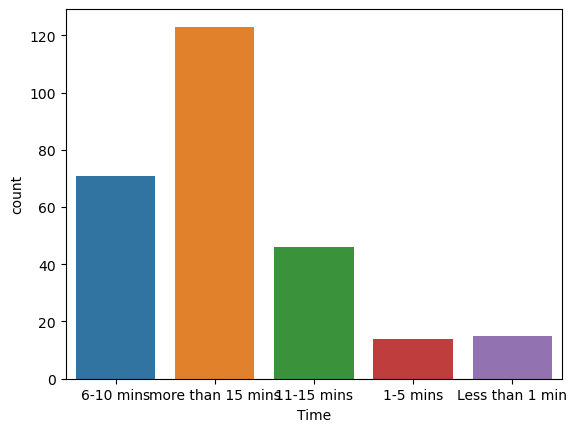

In [61]:
sns.countplot(cdf['Time'])

<AxesSubplot:xlabel='Payment', ylabel='count'>

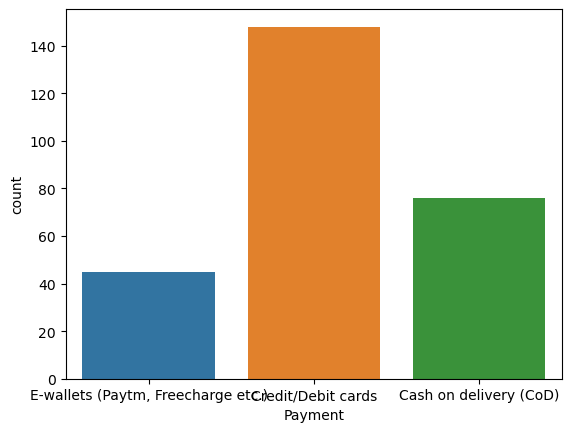

In [62]:
sns.countplot(cdf['Payment'])

<AxesSubplot:xlabel='Abandon', ylabel='count'>

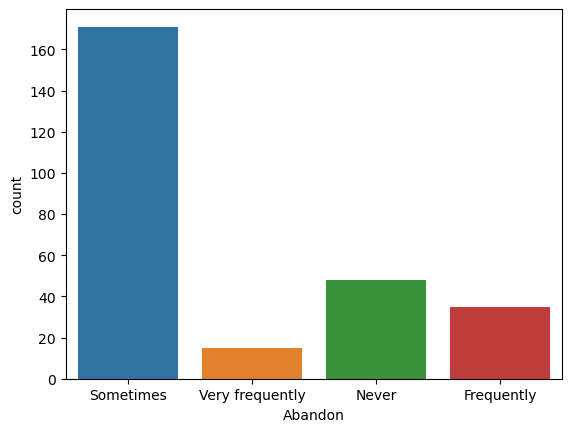

In [63]:
sns.countplot(cdf['Abandon'])

<AxesSubplot:xlabel='Why', ylabel='count'>

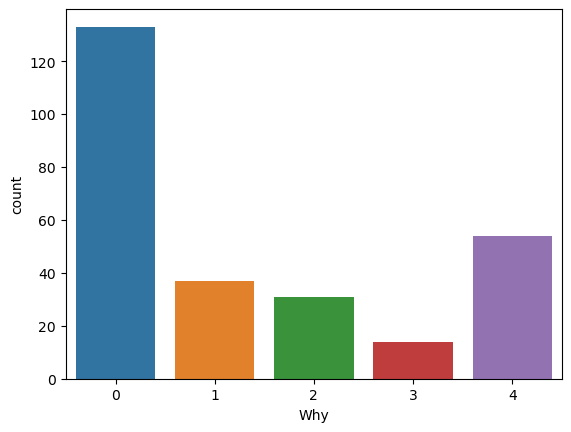

In [66]:
sns.countplot(cdf['Why'])

In [ ]:
lack of trust is the reason of people leaving the items in cart

<AxesSubplot:xlabel='Content', ylabel='count'>

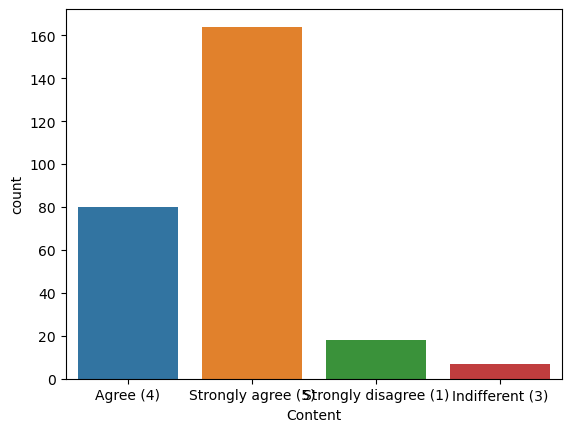

In [67]:
sns.countplot(cdf['Content'])

<AxesSubplot:xlabel='Information', ylabel='count'>

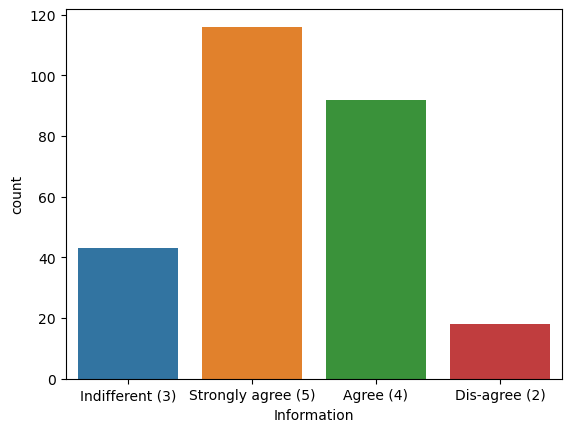

In [68]:
sns.countplot(cdf['Information'])

<AxesSubplot:xlabel='Completeinfo', ylabel='count'>

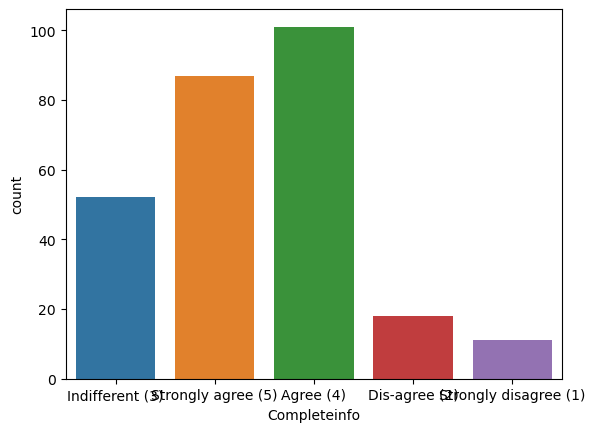

In [69]:
sns.countplot(cdf['Completeinfo'])

<AxesSubplot:xlabel='Relevantinfo', ylabel='count'>

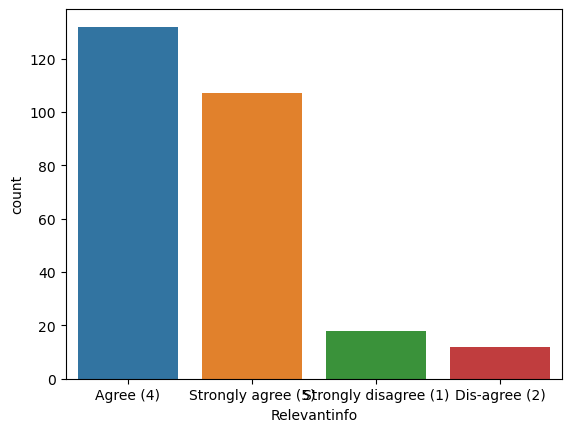

In [70]:
sns.countplot(cdf['Relevantinfo'])

<AxesSubplot:xlabel='Navigation', ylabel='count'>

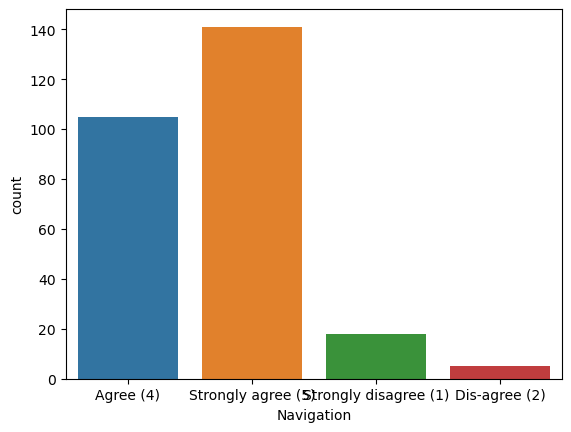

In [71]:
sns.countplot(cdf['Navigation'])

<AxesSubplot:xlabel='Speed', ylabel='count'>

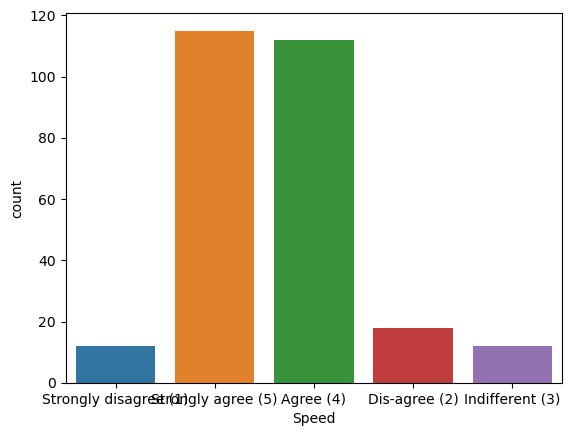

In [72]:
sns.countplot(cdf['Speed'])

<AxesSubplot:xlabel='Userfriendly', ylabel='count'>

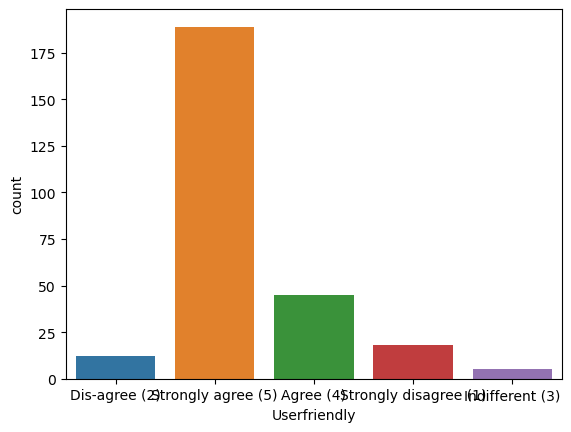

In [73]:
sns.countplot(cdf['Userfriendly'])

<AxesSubplot:xlabel='Paymentmethods', ylabel='count'>

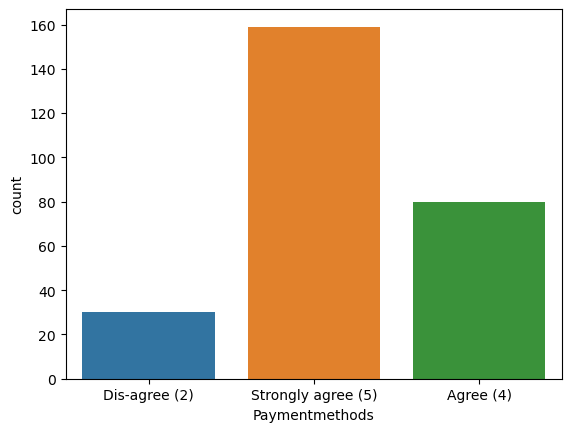

In [74]:
sns.countplot(cdf['Paymentmethods'])

<AxesSubplot:xlabel='Trust', ylabel='count'>

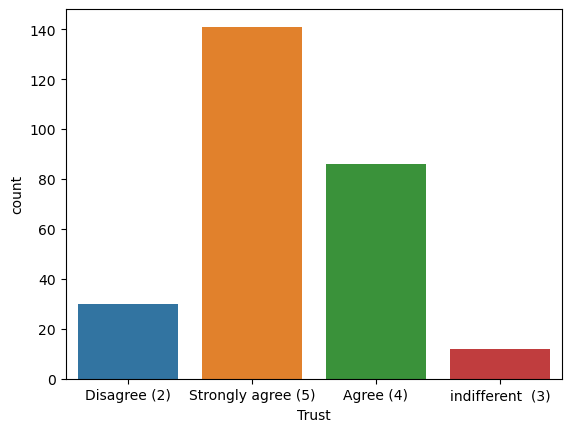

In [75]:
sns.countplot(cdf['Trust'])

<AxesSubplot:xlabel='Empathy', ylabel='count'>

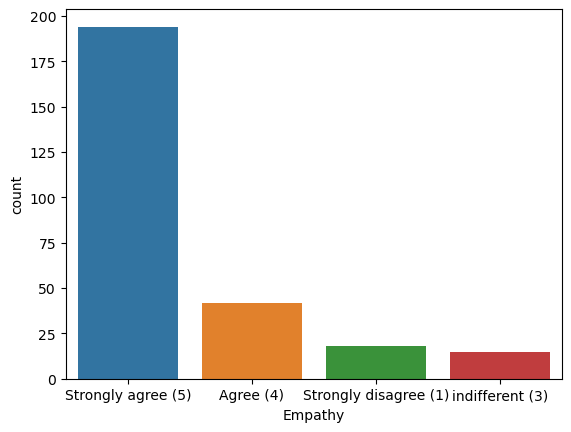

In [76]:
sns.countplot(cdf['Empathy'])

<AxesSubplot:xlabel='Guarantee', ylabel='count'>

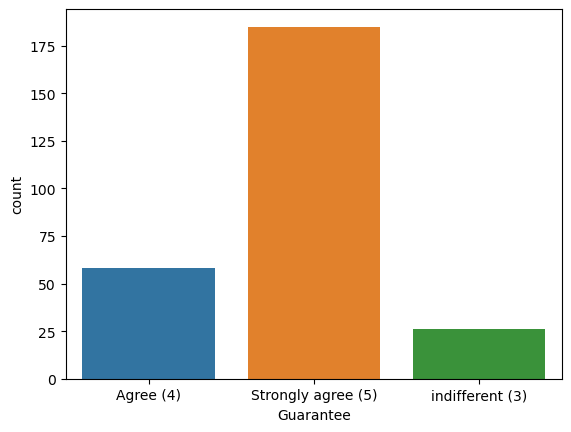

In [77]:
sns.countplot(cdf['Guarantee'])

<AxesSubplot:xlabel='Availability', ylabel='count'>

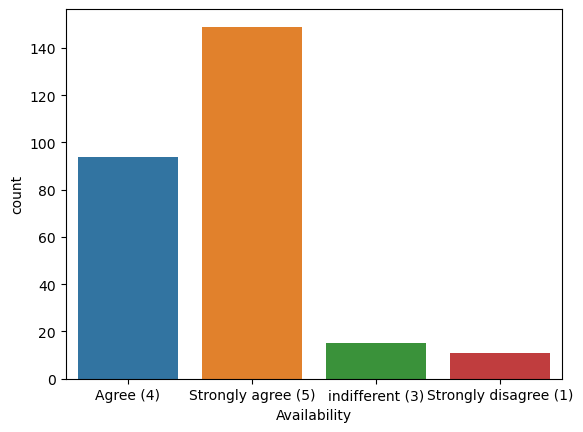

In [78]:
sns.countplot(cdf['Availability'])

<AxesSubplot:xlabel='Discounts', ylabel='count'>

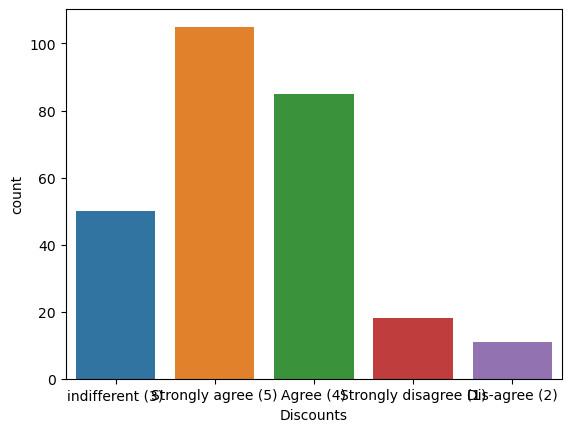

In [79]:
sns.countplot(cdf['Discounts'])

<AxesSubplot:xlabel='Enjoyment', ylabel='count'>

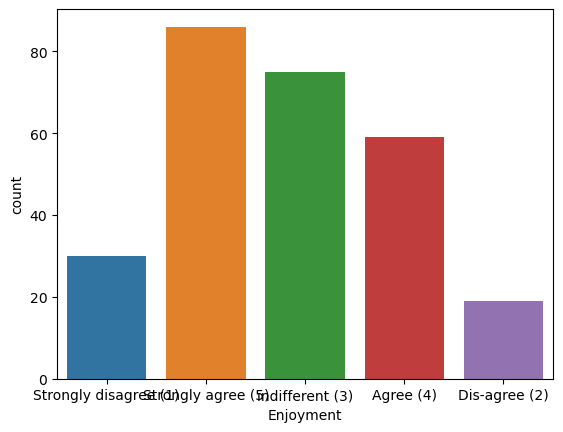

In [80]:
sns.countplot(cdf['Enjoyment'])

<AxesSubplot:xlabel='Flexible', ylabel='count'>

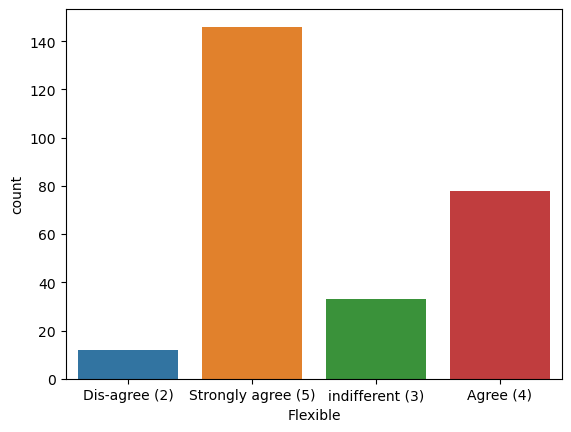

In [81]:
sns.countplot(cdf['Flexible'])

<AxesSubplot:xlabel='Return', ylabel='count'>

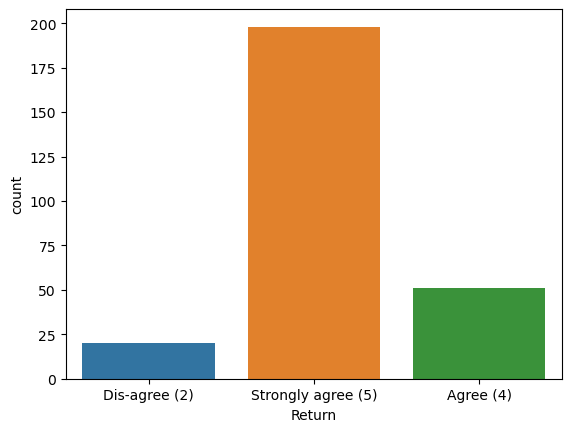

In [82]:
sns.countplot(cdf['Return'])

<AxesSubplot:xlabel='Loyalty', ylabel='count'>

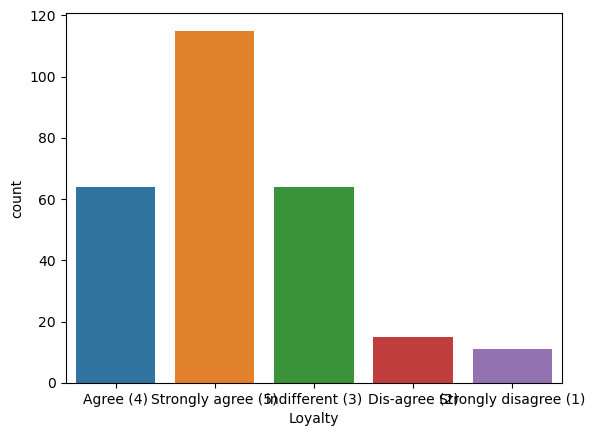

In [83]:
sns.countplot(cdf['Loyalty'])

<AxesSubplot:xlabel='Qualityinfo', ylabel='count'>

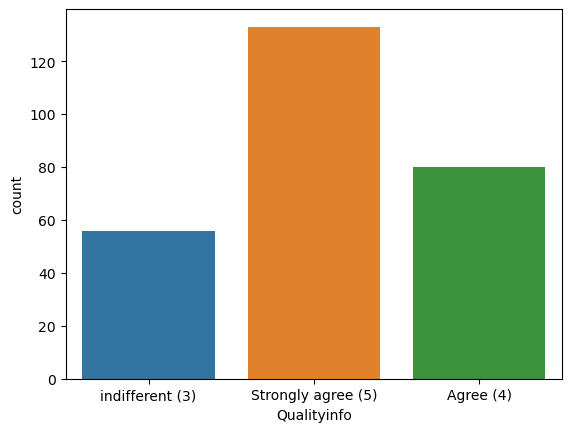

In [84]:
sns.countplot(cdf['Qualityinfo'])

<AxesSubplot:xlabel='Usersatis', ylabel='count'>

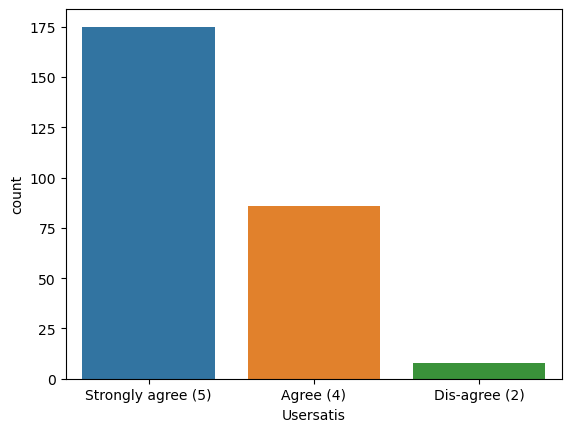

In [85]:
sns.countplot(cdf['Usersatis'])

<AxesSubplot:xlabel='Netbenefit', ylabel='count'>

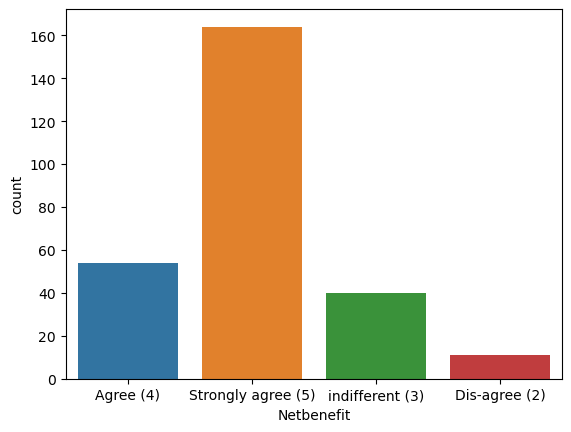

In [86]:
sns.countplot(cdf['Netbenefit'])

<AxesSubplot:xlabel='Usersatwotrust', ylabel='count'>

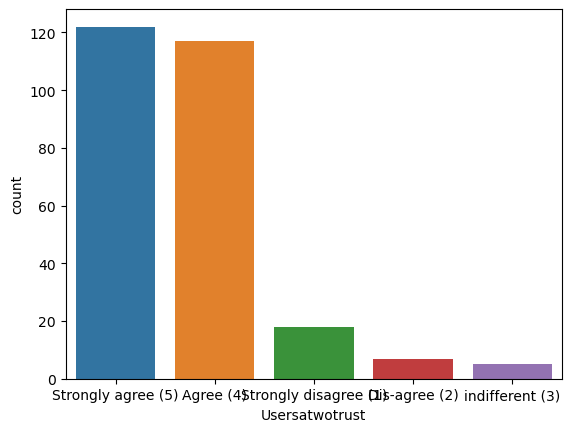

In [87]:
sns.countplot(cdf['Usersatwotrust'])

<AxesSubplot:xlabel='Wide', ylabel='count'>

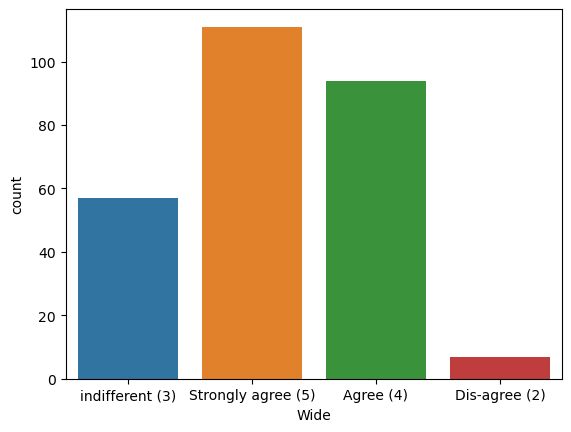

In [88]:
sns.countplot(cdf['Wide'])

<AxesSubplot:xlabel='Provision', ylabel='count'>

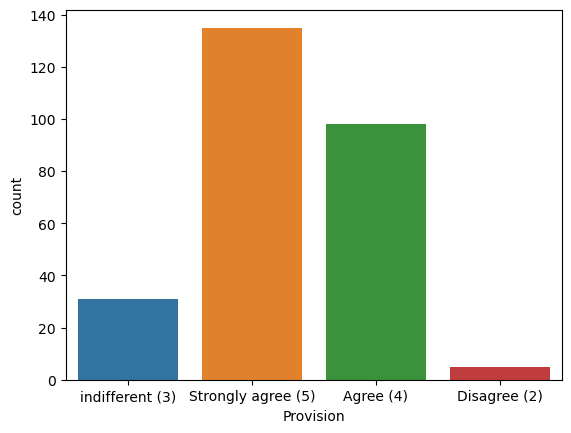

In [89]:
sns.countplot(cdf['Provision'])

<AxesSubplot:xlabel='Monetarysav', ylabel='count'>

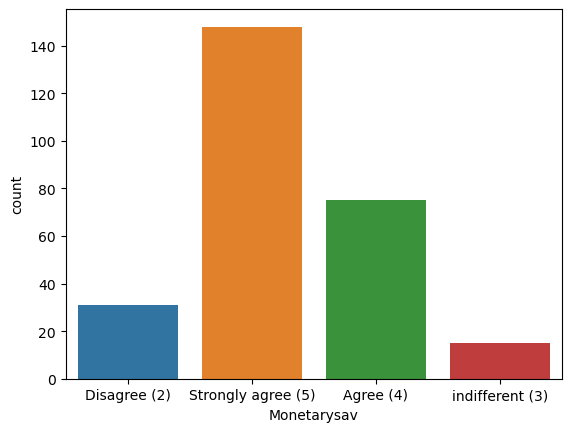

In [90]:
sns.countplot(cdf['Monetarysav'])

<AxesSubplot:xlabel='Convenience', ylabel='count'>

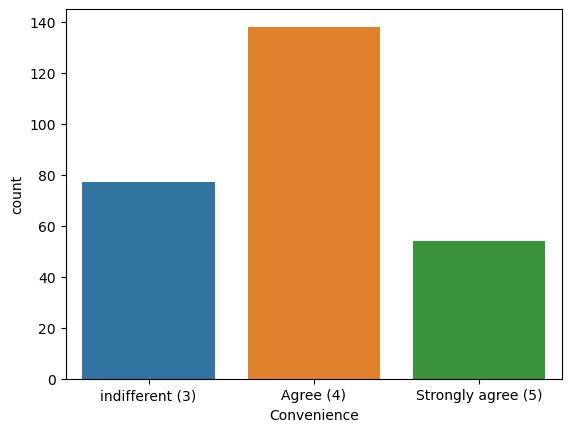

In [91]:
sns.countplot(cdf['Convenience'])

<AxesSubplot:xlabel='Adventure', ylabel='count'>

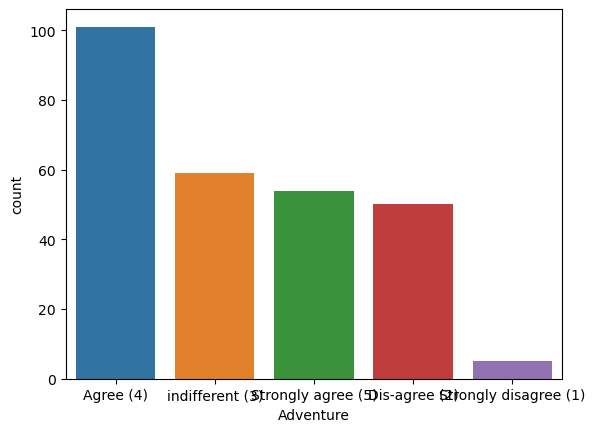

In [92]:
sns.countplot(cdf['Adventure'])

<AxesSubplot:xlabel='SocialStatus', ylabel='count'>

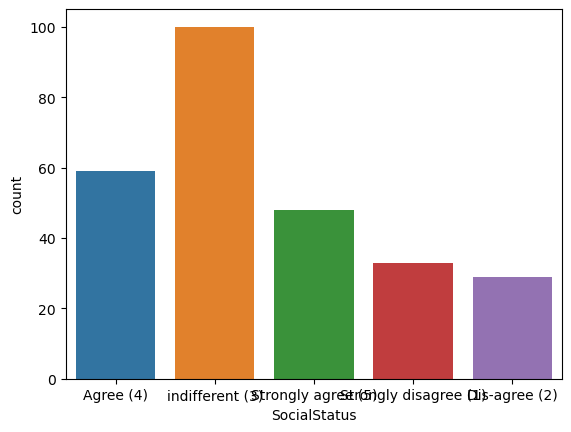

In [94]:
sns.countplot(cdf['SocialStatus'])

<AxesSubplot:xlabel='Gratification', ylabel='count'>

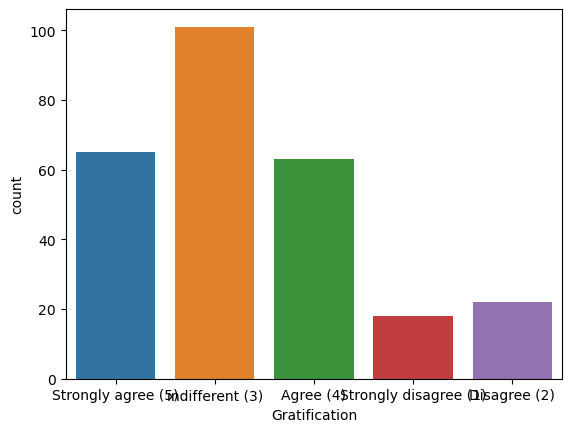

In [95]:
sns.countplot(cdf['Gratification'])

<AxesSubplot:xlabel='Certainroles', ylabel='count'>

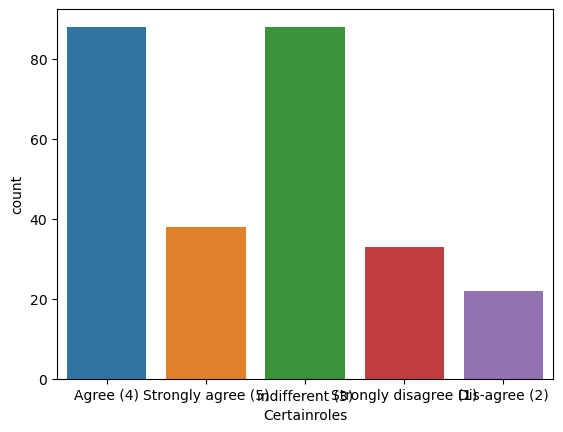

In [96]:
sns.countplot(cdf['Certainroles'])

<AxesSubplot:xlabel='Value', ylabel='count'>

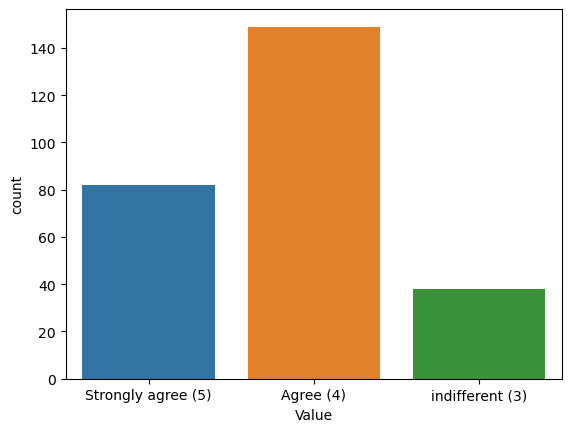

In [97]:
sns.countplot(cdf['Value'])

<AxesSubplot:xlabel='Tickonlineret', ylabel='count'>

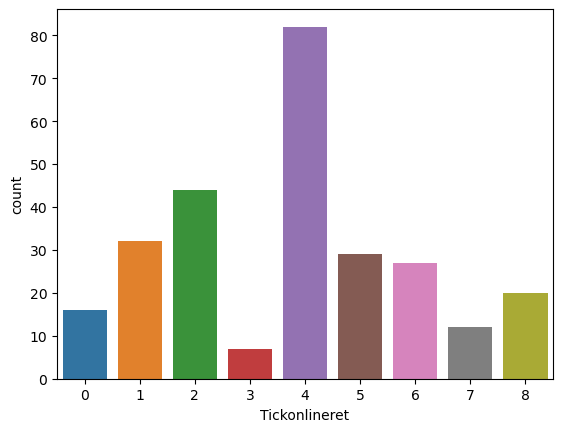

In [100]:
sns.countplot(cdf['Tickonlineret'])

<AxesSubplot:xlabel='Easytouse', ylabel='count'>

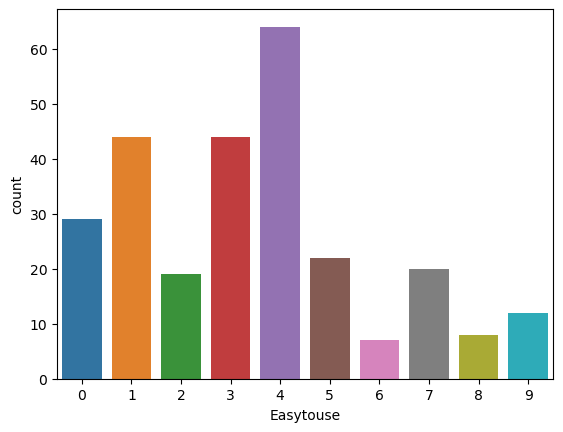

In [103]:
sns.countplot(cdf['Easytouse'])

<AxesSubplot:xlabel='Webpagelayout', ylabel='count'>

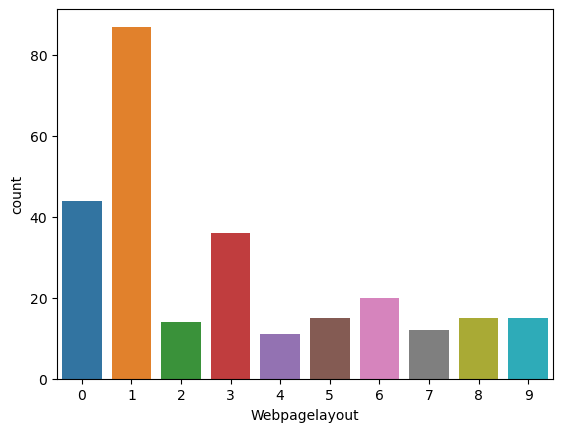

In [106]:
sns.countplot(cdf['Webpagelayout'])

<AxesSubplot:xlabel='Wildvariety', ylabel='count'>

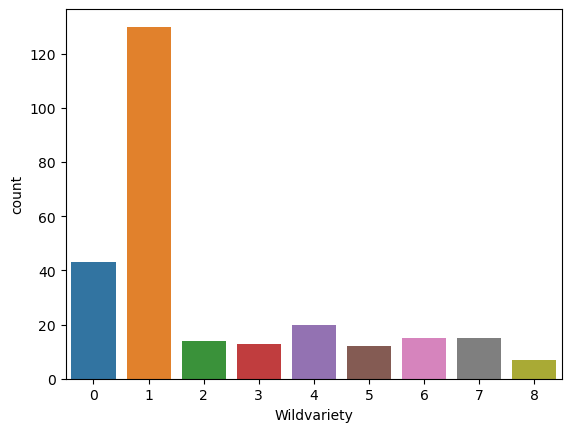

In [109]:
sns.countplot(cdf['Wildvariety'])

<AxesSubplot:xlabel='Completerelevant', ylabel='count'>

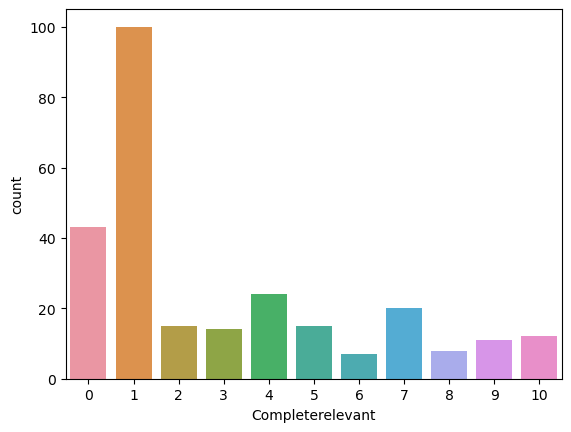

In [112]:
sns.countplot(cdf['Completerelevant'])

<AxesSubplot:xlabel='Fastloading', ylabel='count'>

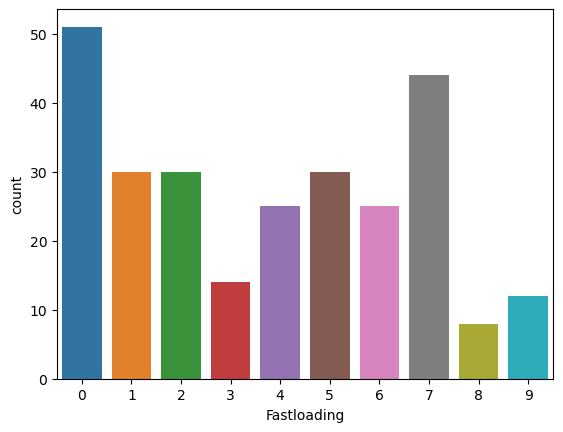

In [115]:
sns.countplot(cdf['Fastloading'])

<AxesSubplot:xlabel='Reliabilityofweb', ylabel='count'>

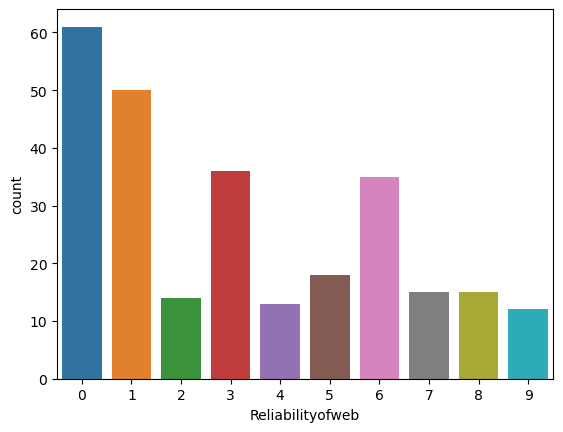

In [119]:
sns.countplot(cdf['Reliabilityofweb'])

<AxesSubplot:xlabel='Qucikness', ylabel='count'>

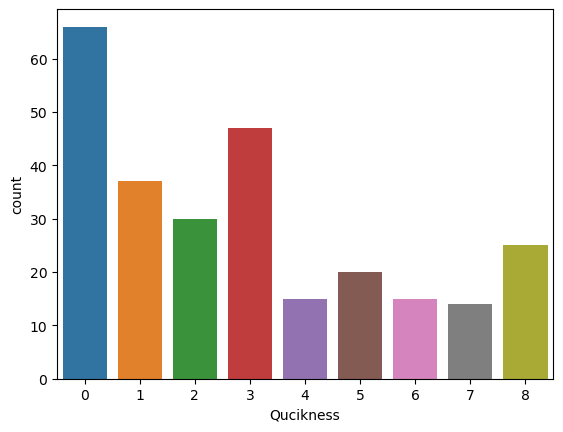

In [123]:
sns.countplot(cdf['Qucikness'])

<AxesSubplot:xlabel='Availpayop', ylabel='count'>

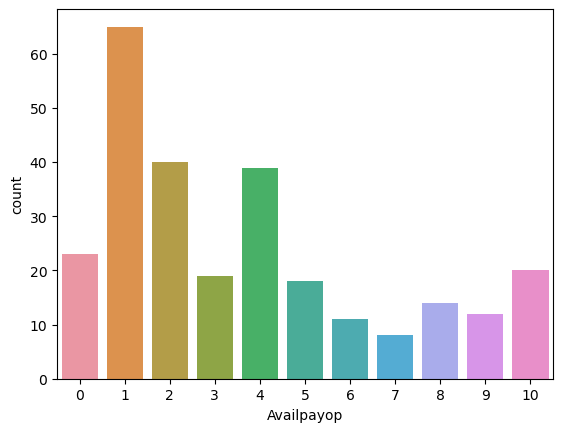

In [126]:
sns.countplot(cdf['Availpayop'])

<AxesSubplot:xlabel='Speedyorderdel', ylabel='count'>

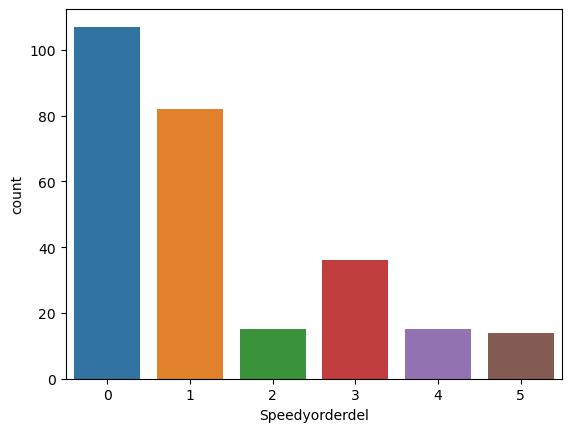

In [129]:
sns.countplot(cdf['Speedyorderdel'])

<AxesSubplot:xlabel='Privofcusinfo', ylabel='count'>

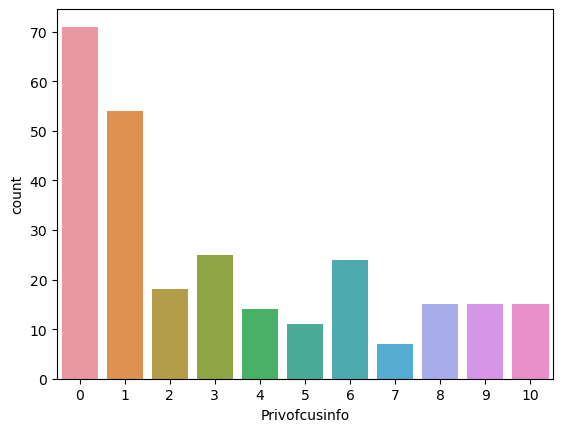

In [136]:
sns.countplot(cdf['Privofcusinfo'])

<AxesSubplot:xlabel='Pertrust', ylabel='count'>

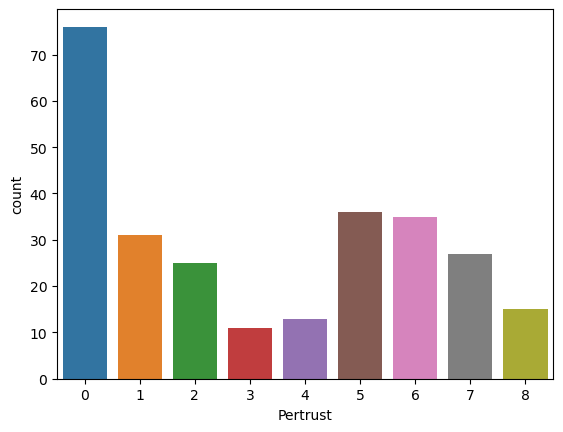

In [139]:
sns.countplot(cdf['Pertrust'])

<AxesSubplot:xlabel='Secofcusinfo', ylabel='count'>

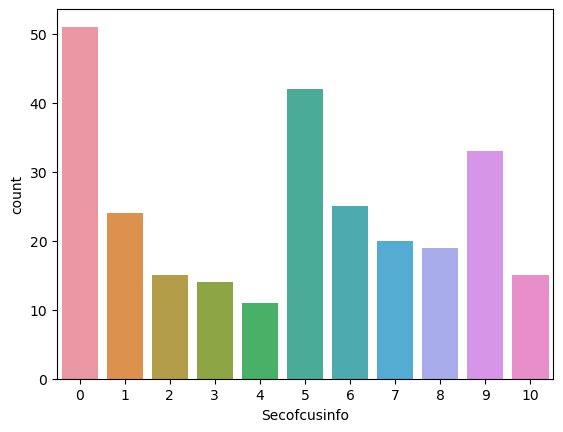

In [140]:
sns.countplot(cdf['Secofcusinfo'])

<AxesSubplot:xlabel='Presenceofmultichan', ylabel='count'>

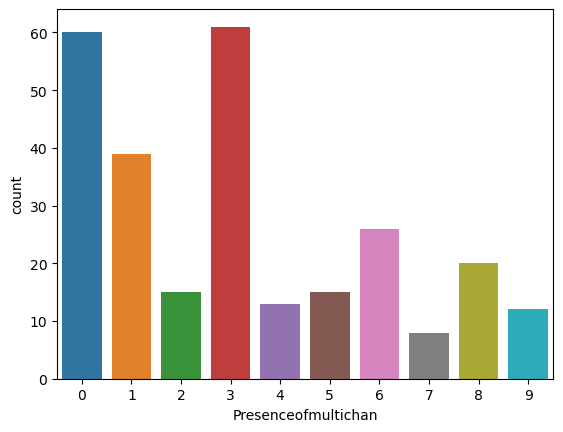

In [143]:
sns.countplot(cdf['Presenceofmultichan'])

<AxesSubplot:xlabel='Longertimeindisplayinggraph', ylabel='count'>

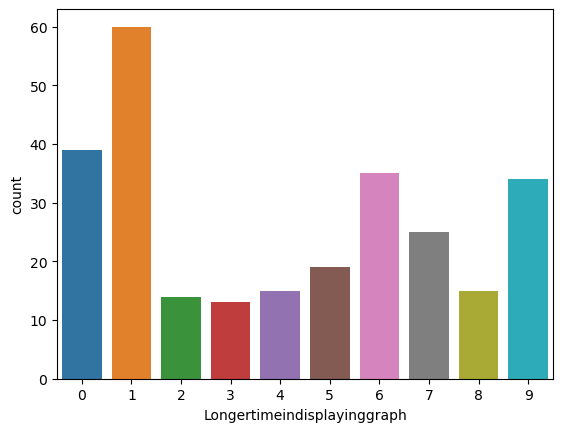

In [144]:
sns.countplot(cdf['Longertimeindisplayinggraph'])

In [6]:
cdf.head()

,Gender,Age,City,Code,Long,Purchases,Access,Device,Screen,OS,...,Longertime,Longertimeindisplayinggraph,Latedecl,Longerpage,Ltdmodeofpay,Longdelper,Changeinweb,Fredis,Webeff,Recommend
0,Male,1,2,110009,Above 4 years,2,Dial-up,Desktop,Others,Window/windows Mobile,...,0,0,3,5,0,3,2,0,0,6
1,Female,0,2,110030,Above 4 years,3,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,1,6,7,10,7,5,0,4,1,3
2,Female,0,4,201308,3-4 years,3,Mobile Internet,Smartphone,5.5 inches,Android,...,7,6,4,7,0,3,5,6,0,5
3,Male,0,6,132001,3-4 years,5,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,9,7,4,8,5,3,1,1,2,1
4,Female,0,0,530068,2-3 years,0,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,5,8,5,8,7,3,0,7,6,3


In [7]:
cdf.tail()

,Gender,Age,City,Code,Long,Purchases,Access,Device,Screen,OS,...,Longertime,Longertimeindisplayinggraph,Latedecl,Longerpage,Ltdmodeofpay,Longdelper,Changeinweb,Fredis,Webeff,Recommend
264,Female,0,10,173212,1-2 years,5,Mobile Internet,Smartphone,5.5 inches,Android,...,0,0,0,0,0,0,0,0,0,0
265,Female,1,3,201008,1-2 years,2,Mobile Internet,Smartphone,Others,Android,...,4,4,3,5,3,1,2,2,4,6
266,Female,2,0,560010,2-3 years,5,Mobile internet,Laptop,Others,Window/windows Mobile,...,0,9,0,10,7,5,6,7,0,0
267,Female,4,10,173229,2-3 years,5,Wi-Fi,Smartphone,5.5 inches,Android,...,0,2,0,4,0,0,0,5,5,0
268,Female,2,3,201009,2-3 years,2,Mobile Internet,Smartphone,5.5 inches,Android,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

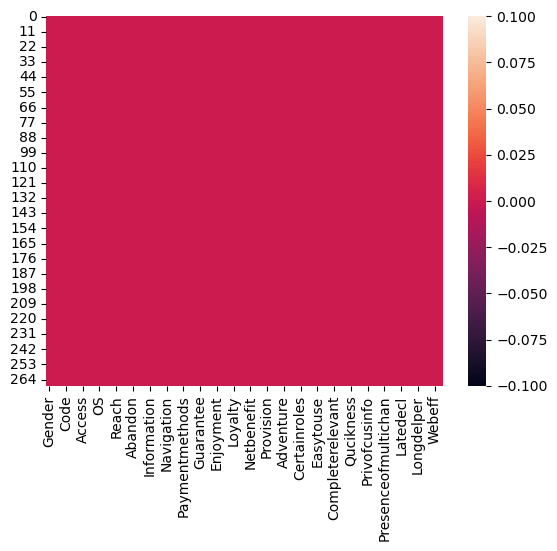

In [8]:
sns.heatmap(cdf.isnull())

In [9]:
cdf.isnull()

,Gender,Age,City,Code,Long,Purchases,Access,Device,Screen,OS,...,Longertime,Longertimeindisplayinggraph,Latedecl,Longerpage,Ltdmodeofpay,Longdelper,Changeinweb,Fredis,Webeff,Recommend
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
cdf.dtypes

Gender         object
Age             int32
City            int32
Code            int64
Long           object
                ...  
Longdelper      int32
Changeinweb     int32
Fredis          int32
Webeff          int32
Recommend       int32
Length: 71, dtype: object

In [11]:
cdf.skew()

Age                            0.680987
City                           0.313729
Code                           1.748322
Purchases                     -0.421739
Why                            0.743052
Tickonlineret                  0.145462
Easytouse                      0.508414
Webpagelayout                  0.813015
Wildvariety                    1.186071
Completerelevant               0.964100
Fastloading                    0.106301
Reliabilityofweb               0.464836
Qucikness                      0.606858
Availpayop                     0.781633
Speedyorderdel                 1.061243
Privofcusinfo                  0.716860
Secofcusinfo                   0.073523
Pertrust                       0.199441
Presenceofmultichan            0.577166
Longertime                     0.131096
Longertimeindisplayinggraph    0.167550
Latedecl                      -0.378929
Longerpage                    -0.708594
Ltdmodeofpay                  -0.086712
Longdelper                    -0.147702


Age                               AxesSubplot(0.125,0.747241;0.110714x0.132759)
City                           AxesSubplot(0.257857,0.747241;0.110714x0.132759)
Code                           AxesSubplot(0.390714,0.747241;0.110714x0.132759)
Purchases                      AxesSubplot(0.523571,0.747241;0.110714x0.132759)
Why                            AxesSubplot(0.656429,0.747241;0.110714x0.132759)
Tickonlineret                  AxesSubplot(0.789286,0.747241;0.110714x0.132759)
Easytouse                         AxesSubplot(0.125,0.587931;0.110714x0.132759)
Webpagelayout                  AxesSubplot(0.257857,0.587931;0.110714x0.132759)
Wildvariety                    AxesSubplot(0.390714,0.587931;0.110714x0.132759)
Completerelevant               AxesSubplot(0.523571,0.587931;0.110714x0.132759)
Fastloading                    AxesSubplot(0.656429,0.587931;0.110714x0.132759)
Reliabilityofweb               AxesSubplot(0.789286,0.587931;0.110714x0.132759)
Qucikness                         AxesSu

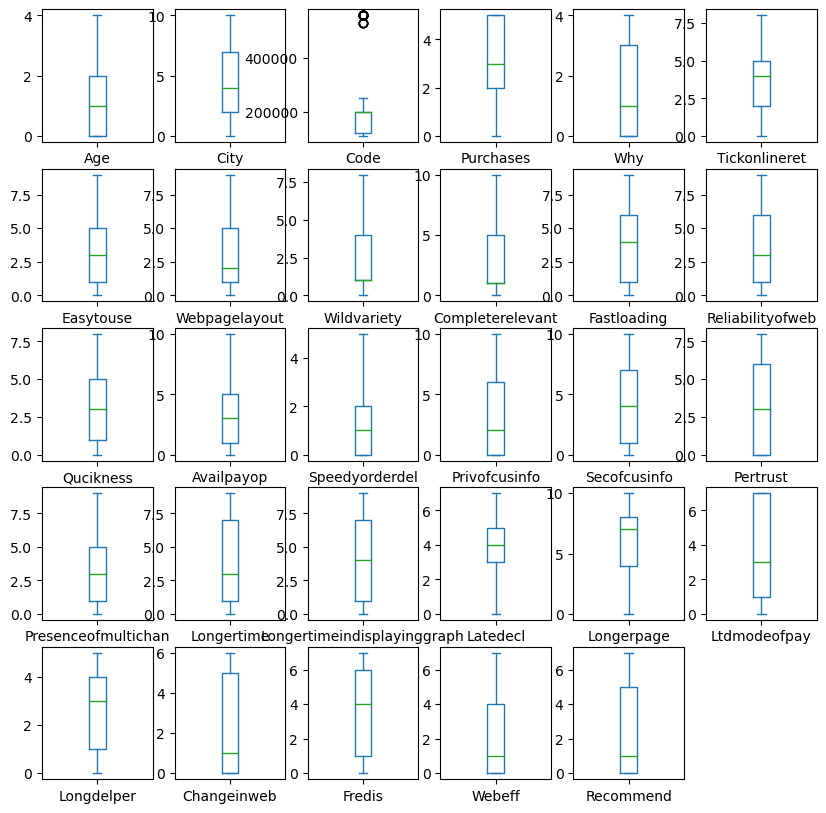

In [8]:
cdf.plot(kind='box',subplots=True,layout=(5,6),figsize=(10,10))

In [9]:
z=np.abs(zscore(cdf))
z

TypeError: unsupported operand type(s) for /: 'str' and 'int'